<a href="https://colab.research.google.com/github/ItsMeYobs/Sentiment-Analysis-and-Virality-Check/blob/main/All_Pretrained_With_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


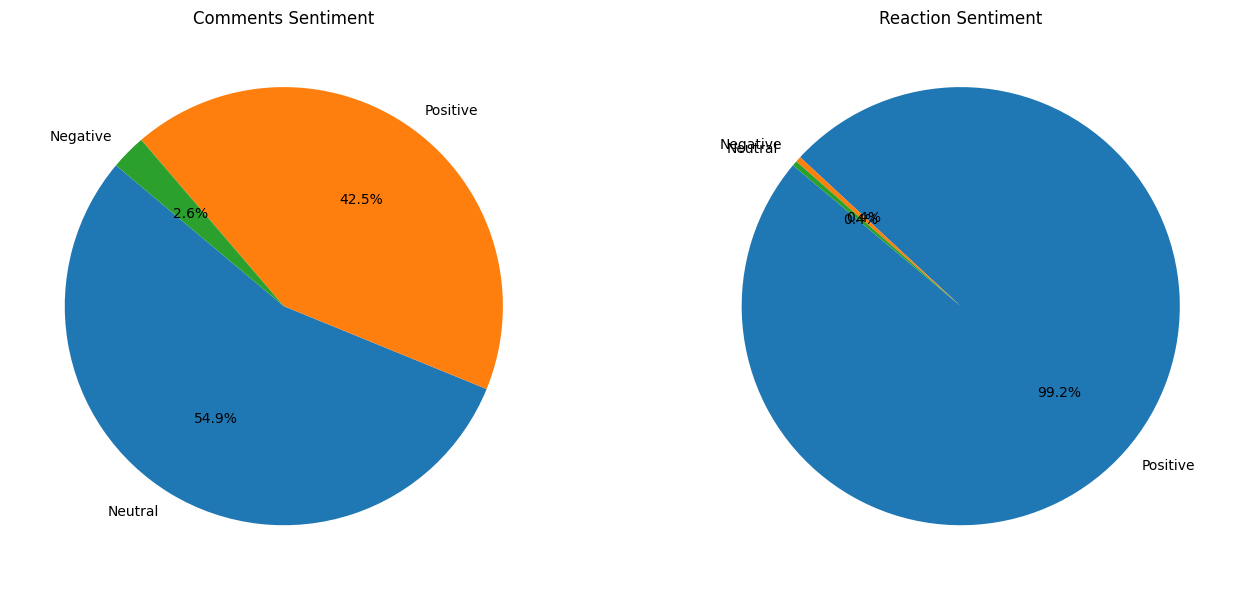

,Content,Comments_sentiment,Reaction_Sentiment_Classification
0,𝗠𝗮𝗹𝗮𝘀𝗮 𝗣𝗮 𝗥𝗶𝗻 𝗮𝗻𝗴 𝗦𝗮𝗯𝗮𝘄 𝘀𝗮 𝗩𝗶𝗱𝗮𝗱’𝘀 (The Soup a...,Neutral,Positive
1,On the 128th anniversary of Dr. Jose P. Rizal’...,Neutral,Positive
2,𝗝𝗢𝗕 𝗢𝗣𝗘𝗡𝗜𝗡𝗚𝗦 | MMSU College of Health Sciences...,Positive,Positive
3,"𝗡𝗘𝗪𝗦 | MMSU, BluC 53 bring startup opportuniti...",Positive,Positive
4,𝗝𝗢𝗕 𝗢𝗣𝗘𝗡𝗜𝗡𝗚𝗦 | MMSU College of Arts and Scienc...,Neutral,Positive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# File URL (Make sure the file is shared publicly or with 'Anyone with the link')
url1 = 'https://drive.google.com/file/d/1B6M9h-r-N9T8VnwO7yruY6r0R-qnlNpK/view?usp=drive_link'

# Extract the file ID from the Google Drive URL
file_id1 = url1.split('/')[-2]

# Construct the download URL
dwn_url1 = 'https://drive.google.com/uc?id=' + file_id1

# Load the CSV file into a DataFrame
df1 = pd.read_csv(dwn_url1)

# Download required NLTK data
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define reaction weights
weights = {
    "heart": 2,
    "care": 1.5,
    "haha": 1,
    "wow": 1.2,
    "like": 1,
    "sad": -1.5,
    "angry": -2
}

# Ensure reaction columns are numeric
reaction_columns = ['Heart', 'Care', 'Haha', 'Wow', 'Like', 'Sad', 'Angry']
for col in reaction_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce').fillna(0)

# Calculate sentiment score for reactions
df1['Reaction_Sentiment'] = (
    df1['Heart'] * weights['heart'] +
    df1['Care'] * weights['care'] +
    df1['Haha'] * weights['haha'] +
    df1['Wow'] * weights['wow'] +
    df1['Like'] * weights['like'] +
    df1['Sad'] * weights['sad'] +
    df1['Angry'] * weights['angry']
)

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Perform sentiment analysis on Comments
df1['Comments'] = df1['Comments'].astype(str)
df1['Comments_sentiment'] = df1['Comments'].apply(lambda x: classify_sentiment(sia.polarity_scores(x)['compound']))

# Classify Reaction Sentiment
df1['Reaction_Sentiment_Classification'] = df1['Reaction_Sentiment'].apply(classify_sentiment)

# Display first few rows of the sentiment results
df1[['Content','Comments_sentiment', 'Reaction_Sentiment_Classification']].head()
# Plotting Pie Charts
comments_counts = df1['Comments_sentiment'].value_counts()
reaction_counts = df1['Reaction_Sentiment_Classification'].value_counts()

# Set up subplot grid
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Comments sentiment
axs[0].pie(comments_counts, labels=comments_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Comments Sentiment')

# Pie chart for Reaction sentiment
axs[1].pie(reaction_counts, labels=reaction_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Reaction Sentiment')

# Improve layout
plt.tight_layout()
plt.show()

# Display first few rows of the sentiment results
df1[['Content','Comments_sentiment', 'Reaction_Sentiment_Classification']].head()

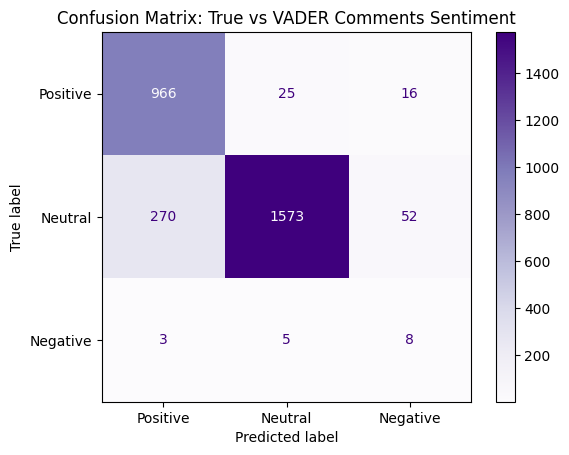

Classification Report:
              precision    recall  f1-score   support

    Positive       0.78      0.96      0.86      1007
     Neutral       0.98      0.83      0.90      1895
    Negative       0.11      0.50      0.17        16

    accuracy                           0.87      2918
   macro avg       0.62      0.76      0.64      2918
weighted avg       0.91      0.87      0.88      2918



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion matrix
cm = confusion_matrix(df1['True Comment Sentiment'], df1['Comments_sentiment'], labels=['Positive', 'Neutral', 'Negative'])

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix: True vs VADER Comments Sentiment")
plt.show()

# Metrics
print("Classification Report:")
print(classification_report(df1['True Comment Sentiment'], df1['Comments_sentiment'], labels=['Positive', 'Neutral', 'Negative']))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=f9a4c8377546c4a396892545b5bf49584c231afe17711477082ab090e5fa3a76
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


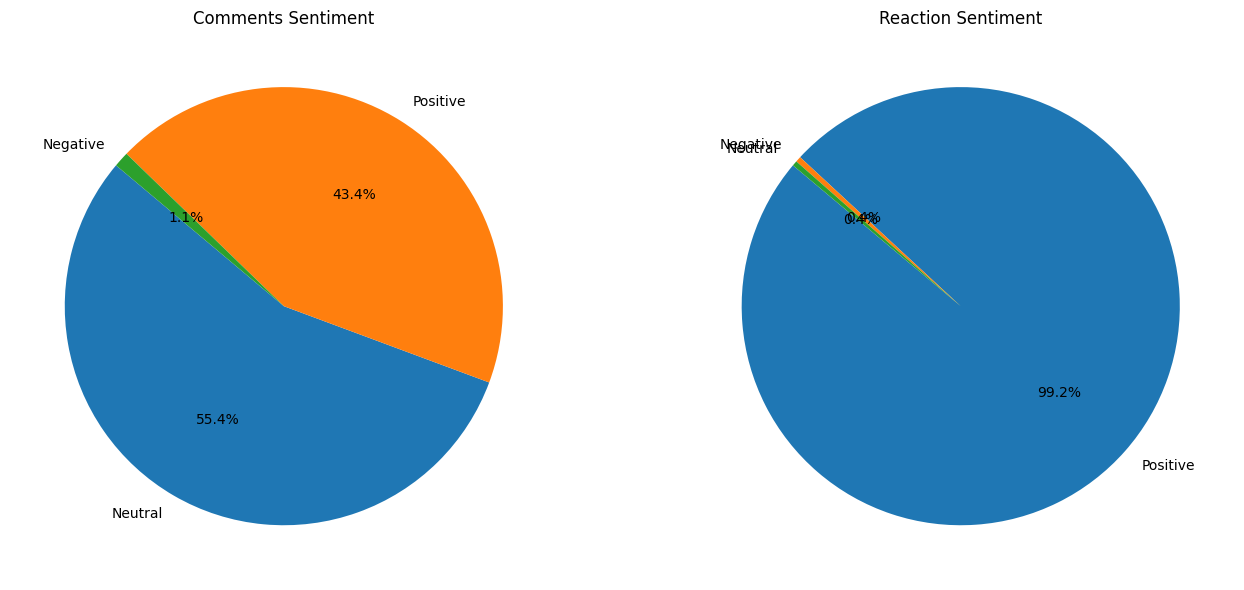

                                                 Url  \
0  https://www.facebook.com/MMSUofficial/videos/1...   
1  https://www.facebook.com/MMSUofficial/posts/pf...   
2  https://www.facebook.com/MMSUofficial/posts/pf...   
3  https://www.facebook.com/MMSUofficial/posts/pf...   
4  https://www.facebook.com/MMSUofficial/posts/pf...   
5  https://www.facebook.com/MMSUofficial/posts/pf...   
6  https://www.facebook.com/MMSUofficial/posts/pf...   
7  https://www.facebook.com/MMSUofficial/posts/pf...   
8  https://www.facebook.com/MMSUofficial/posts/pf...   
9  https://www.facebook.com/MMSUofficial/videos/1...   

                                             Content Comments_sentiment  \
0  𝗠𝗮𝗹𝗮𝘀𝗮 𝗣𝗮 𝗥𝗶𝗻 𝗮𝗻𝗴 𝗦𝗮𝗯𝗮𝘄 𝘀𝗮 𝗩𝗶𝗱𝗮𝗱’𝘀 (The Soup a...            Neutral   
1  On the 128th anniversary of Dr. Jose P. Rizal’...            Neutral   
2  𝗝𝗢𝗕 𝗢𝗣𝗘𝗡𝗜𝗡𝗚𝗦 | MMSU College of Health Sciences...           Positive   
3  𝗡𝗘𝗪𝗦 | MMSU, BluC 53 bring startup opportuniti...           Positive   
4  𝗝𝗢𝗕 𝗢

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File URL (Make sure the file is shared publicly or with 'Anyone with the link')
url2 = 'https://drive.google.com/file/d/1B6M9h-r-N9T8VnwO7yruY6r0R-qnlNpK/view?usp=drive_link'

# Extract the file ID from the Google Drive URL
file_id2 = url2.split('/')[-2]

# Construct the download URL
dwn_url2 = 'https://drive.google.com/uc?id=' + file_id2

# Load the CSV file into a DataFrame
df2 = pd.read_csv(dwn_url2)

# Install and import Afinn
!pip install afinn
from afinn import Afinn
afinn = Afinn()

# Define function to classify sentiment from Afinn score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Define reaction weights
weights = {
    "heart": 2,
    "care": 1.5,
    "haha": 1,
    "wow": 1.2,
    "like": 1,
    "sad": -1.5,
    "angry": -2
}

# Ensure reaction columns are numeric
reaction_columns = ['Heart', 'Care', 'Haha', 'Wow', 'Like', 'Sad', 'Angry']
for col in reaction_columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce').fillna(0)

# Calculate sentiment score for reactions
df2['Reaction_Sentiment_Score'] = (
    df2['Heart'] * weights['heart'] +
    df2['Care'] * weights['care'] +
    df2['Haha'] * weights['haha'] +
    df2['Wow'] * weights['wow'] +
    df2['Like'] * weights['like'] +
    df2['Sad'] * weights['sad'] +
    df2['Angry'] * weights['angry']
)

# Classify Reaction Sentiment
df2['Reaction_Sentiment'] = df2['Reaction_Sentiment_Score'].apply(classify_sentiment)

# Perform Afinn sentiment analysis on Content and Comments
columns_to_analyze = ['Content', 'Comments']
for col in columns_to_analyze:
    if col in df2.columns:
        df2[col] = df2[col].astype(str)
        df2[f'{col}_sentiment'] = df2[col].apply(lambda x: classify_sentiment(afinn.score(x)))

# Plot pie charts
comments_counts = df2['Comments_sentiment'].value_counts()
reaction_counts = df2['Reaction_Sentiment'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].pie(comments_counts, labels=comments_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Comments Sentiment')

axs[1].pie(reaction_counts, labels=reaction_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Reaction Sentiment')

plt.tight_layout()
plt.show()
# Display first few rows of the sentiment results
print(df2[['Url','Content','Comments_sentiment', 'Reaction_Sentiment']].head(10))

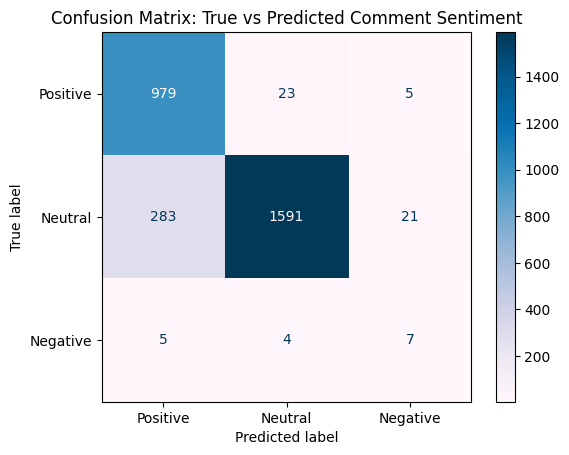

Classification Report:
              precision    recall  f1-score   support

    Positive       0.77      0.97      0.86      1007
     Neutral       0.98      0.84      0.91      1895
    Negative       0.21      0.44      0.29        16

    accuracy                           0.88      2918
   macro avg       0.66      0.75      0.68      2918
weighted avg       0.91      0.88      0.89      2918



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create the confusion matrix
cm = confusion_matrix(df2['True Comment Sentiment'], df2['Comments_sentiment'], labels=['Positive', 'Neutral', 'Negative'])

# Display the confusion matrix with cyan-like colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='PuBu')  # Cyan-blue color map
plt.title("Confusion Matrix: True vs Predicted Comment Sentiment")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(df2['True Comment Sentiment'], df2['Comments_sentiment'], labels=['Positive', 'Neutral', 'Negative']))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 1.13.1 which is incompatible.
accelerate 1.6.0 requires torch>=2.0.0, but you have torch 1.13.1 w

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

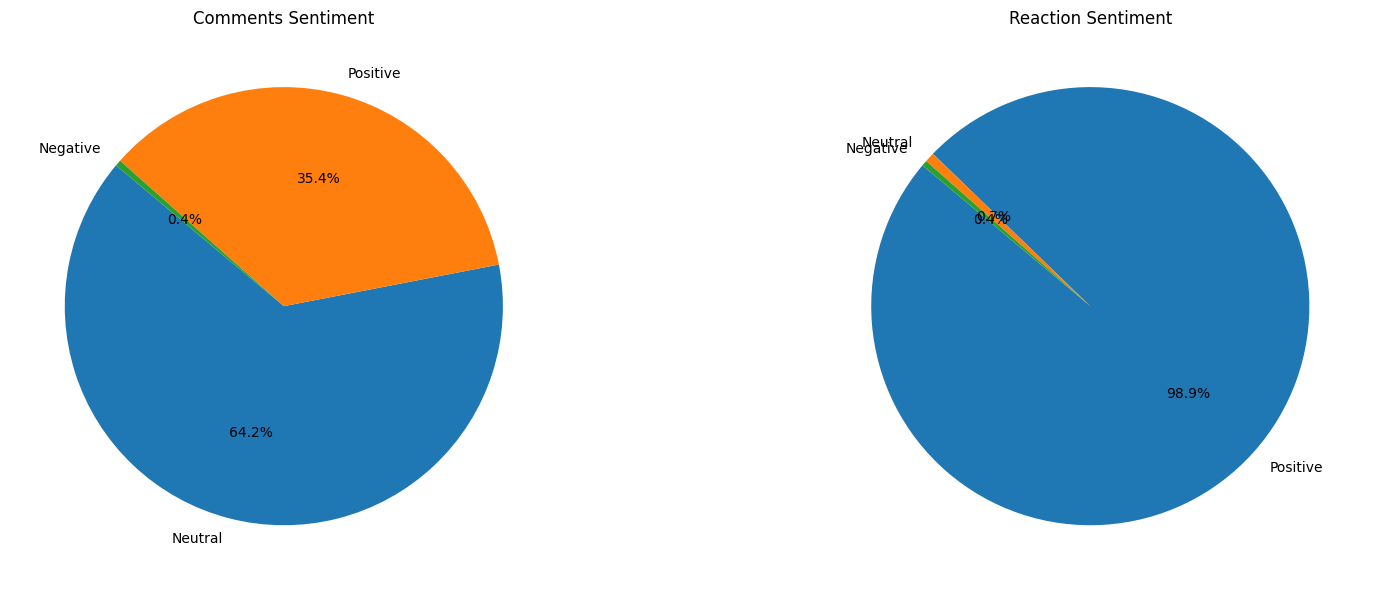

,Content,Comments_Sentiment,Sentiment React
0,𝗠𝗮𝗹𝗮𝘀𝗮 𝗣𝗮 𝗥𝗶𝗻 𝗮𝗻𝗴 𝗦𝗮𝗯𝗮𝘄 𝘀𝗮 𝗩𝗶𝗱𝗮𝗱’𝘀 (The Soup a...,Neutral,Positive
1,On the 128th anniversary of Dr. Jose P. Rizal’...,Neutral,Positive
2,𝗝𝗢𝗕 𝗢𝗣𝗘𝗡𝗜𝗡𝗚𝗦 | MMSU College of Health Sciences...,Positive,Positive
3,"𝗡𝗘𝗪𝗦 | MMSU, BluC 53 bring startup opportuniti...",Positive,Positive
4,𝗝𝗢𝗕 𝗢𝗣𝗘𝗡𝗜𝗡𝗚𝗦 | MMSU College of Arts and Scienc...,Positive,Positive


In [ ]:
# Install required libraries
!pip install torch==1.13.1
!pip install transformers==4.25.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# File URL (Make sure the file is shared publicly or with 'Anyone with the link')
url3 = 'https://drive.google.com/file/d/1B6M9h-r-N9T8VnwO7yruY6r0R-qnlNpK/view?usp=drive_link'

# Extract the file ID from the Google Drive URL
file_id3 = url3.split('/')[-2]

# Construct the download URL
dwn_url3 = 'https://drive.google.com/uc?id=' + file_id3

# Load the CSV file into a DataFrame
df3 = pd.read_csv(dwn_url3)

# Load RoBERTa model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define reaction weights
weights = {
    "heart": 2,
    "care": 1.5,
    "haha": 1,
    "wow": 1.2,
    "like": 1,  # Added like as mildly positive
    "sad": -1.5,
    "angry": -2
}

# Ensure the columns are numeric, convert if necessary
columns_to_check = ['Heart', 'Care', 'Haha', 'Wow', 'Like', 'Sad', 'Angry']
for col in columns_to_check:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')  # Converts to numeric, sets errors to NaN

# Calculate sentiment score for each post
df3['Sentiment_Score'] = (
    df3['Heart'] * weights['heart'] +
    df3['Care'] * weights['care'] +
    df3['Haha'] * weights['haha'] +
    df3['Wow'] * weights['wow'] +
    df3['Like'] * weights['like'] +
    df3['Sad'] * weights['sad'] +
    df3['Angry'] * weights['angry']
)

# Assign sentiment based on the reaction score
df3['Sentiment React'] = df3['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Function to analyze sentiment using RoBERTa
def analyze_sentiment(text):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        output = model(**tokens)
    scores = torch.nn.functional.softmax(output.logits, dim=-1)[0]
    labels = ["Negative", "Neutral", "Positive"]
    sentiment = labels[scores.argmax().item()]
    return sentiment

# Apply RoBERTa sentiment analysis to 'Content' and 'Comments'
df3['Content_Sentiment'] = df3['Content'].astype(str).apply(analyze_sentiment)
df3['Comments_Sentiment'] = df3['Comments'].astype(str).apply(analyze_sentiment)

# Plot Pie Charts
comments_counts = df3['Comments_Sentiment'].value_counts()
reaction_counts = df3['Sentiment React'].value_counts()

# Set up subplot grid (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Pie chart for Comments sentiment
axs[0].pie(comments_counts, labels=comments_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Comments Sentiment')

# Pie chart for Reaction sentiment
axs[1].pie(reaction_counts, labels=reaction_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Reaction Sentiment')

# Improve layout
plt.tight_layout()
plt.show()
df3[['Content','Comments_Sentiment', 'Sentiment React']].head()

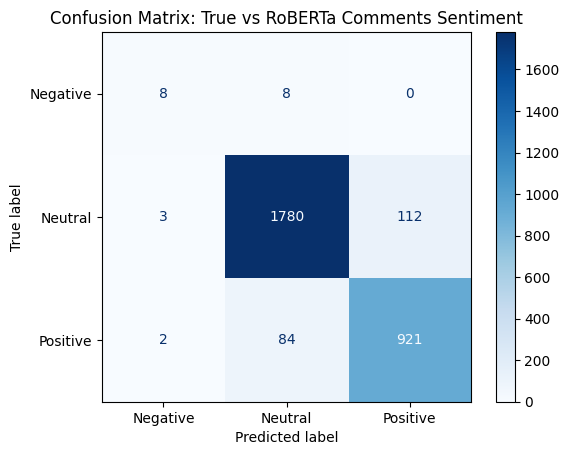

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure the labels are consistent and clean
y_true = df3['True Comment Sentiment'].astype(str)
y_pred = df3['Comments_Sentiment'].astype(str)

# Define the sentiment categories to use in a consistent order
labels = ['Negative', 'Neutral', 'Positive']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: True vs RoBERTa Comments Sentiment")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Metrics function
def get_metrics(true, pred):
    acc = accuracy_score(true, pred)
    precision, recall, f1, _ = precision_recall_fscore_support(true, pred, average='weighted', zero_division=0)
    return acc, precision, recall, f1

# VADER
vader_comment_metrics = get_metrics(df1['True Comment Sentiment'], df1['Comments_sentiment'])
vader_reaction_metrics = get_metrics(df1['True Reaction Sentiment'], df1['Reaction_Sentiment_Classification'])

# AFINN
afinn_comment_metrics = get_metrics(df2['True Comment Sentiment'], df2['Comments_sentiment'])
afinn_reaction_metrics = get_metrics(df2['True Reaction Sentiment'], df2['Reaction_Sentiment'])

#RoBERTa
roberta_comment_metrics = get_metrics(df3['True Comment Sentiment'], df3['Comments_Sentiment'])
roberta_reaction_metrics = get_metrics(df3['True Reaction Sentiment'], df3['Sentiment React'])

# Create a comparison DataFrame
metrics_df = pd.DataFrame({
    'Model': ['VADER', 'VADER', 'AFINN', 'AFINN', 'RoBERTa', 'RoBERTa'],
    'Type': ['Comment', 'Reaction', 'Comment', 'Reaction', 'Comment', 'Reaction'],
    'Accuracy': [vader_comment_metrics[0], vader_reaction_metrics[0],
                 afinn_comment_metrics[0], afinn_reaction_metrics[0],
                 roberta_comment_metrics[0], roberta_reaction_metrics[0]],
    'Precision': [vader_comment_metrics[1], vader_reaction_metrics[1],
                  afinn_comment_metrics[1], afinn_reaction_metrics[1],
                  roberta_comment_metrics[1], roberta_reaction_metrics[1]],
    'Recall': [vader_comment_metrics[2], vader_reaction_metrics[2],
               afinn_comment_metrics[2], afinn_reaction_metrics[2],
               roberta_comment_metrics[2], roberta_reaction_metrics[2]],
    'F1-Score': [vader_comment_metrics[3], vader_reaction_metrics[3],
                 afinn_comment_metrics[3], afinn_reaction_metrics[3],
                 roberta_comment_metrics[3], roberta_reaction_metrics[3]],
})

metrics_df


NameError: name 'df1' is not defined

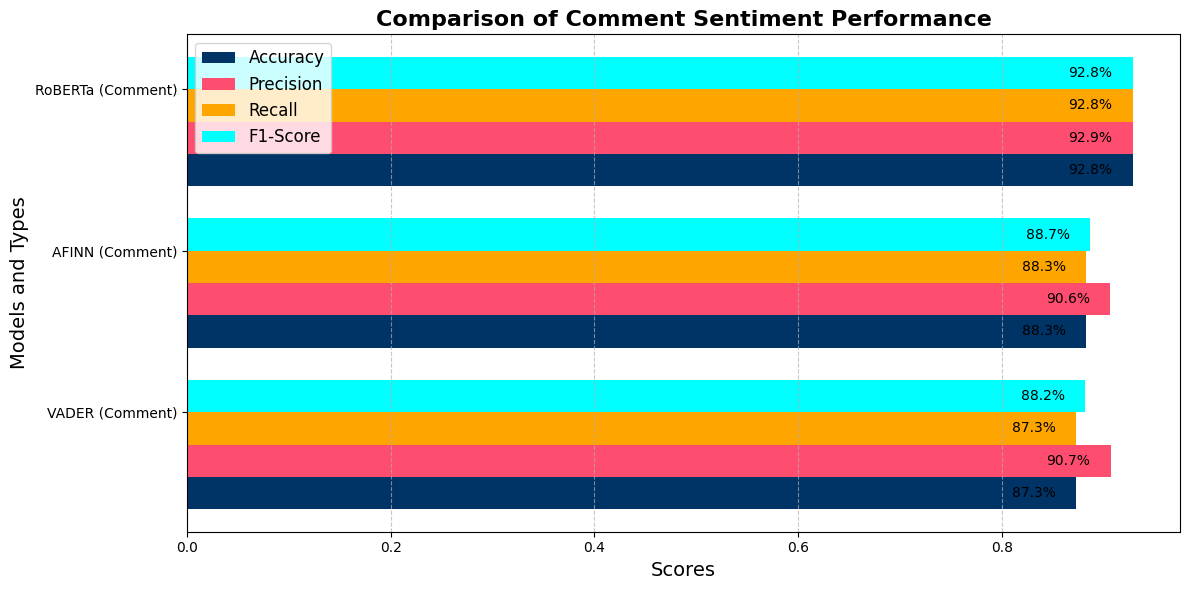

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter out only "Comment" rows from metrics_df
comment_metrics_df = metrics_df[metrics_df['Type'] == 'Comment']

# Set up the bar height and index for the Comment metrics
bar_height = 0.2
index = np.arange(len(comment_metrics_df))  # Use only the Comment metrics

# Create figure for Comment metrics
fig, ax = plt.subplots(figsize=(12, 6))

# Define the color palette based on user preferences
colors_comment = ['#003366', '#FF4D70', '#FFA500', '#00FFFF']  # Navy Blue, Pinky Red, Yellow Orange, Cyan

# Define the bar positions for Comment metrics (horizontal bars)
bar1 = ax.barh(index - bar_height, comment_metrics_df['Accuracy'], bar_height, label='Accuracy', color=colors_comment[0])
bar2 = ax.barh(index, comment_metrics_df['Precision'], bar_height, label='Precision', color=colors_comment[1])
bar3 = ax.barh(index + bar_height, comment_metrics_df['Recall'], bar_height, label='Recall', color=colors_comment[2])
bar4 = ax.barh(index + 2*bar_height, comment_metrics_df['F1-Score'], bar_height, label='F1-Score', color=colors_comment[3])

# Add scores inside the bars for Comment metrics
def add_scores(bars, scores):
    for bar, score in zip(bars, scores):
        width = bar.get_width()
        ax.text(width - 0.02, bar.get_y() + bar.get_height() / 2,  # Position the score text
                f'{score*100:.1f}%',  # Display percentage with one decimal place
                va='center', ha='right', color='black')  # Set color of text to black

# Add scores to Comment bars
add_scores(bar1, comment_metrics_df['Accuracy'])
add_scores(bar2, comment_metrics_df['Precision'])
add_scores(bar3, comment_metrics_df['Recall'])
add_scores(bar4, comment_metrics_df['F1-Score'])

# Set labels and titles for Comment metrics
ax.set_xlabel('Scores', fontsize=14)
ax.set_ylabel('Models and Types', fontsize=14)
ax.set_title('Comparison of Comment Sentiment Performance', fontsize=16, fontweight='bold')

# Customizing the y-axis labels for Comment metrics
ax.set_yticks(index + bar_height * 1.5)  # Adjust for better spacing
ax.set_yticklabels([f'{row["Model"]} ({row["Type"]})' for _, row in comment_metrics_df.iterrows()])
ax.legend(loc='upper left', fontsize=12)

# Improve aesthetics with gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize the layout and show the plot
plt.tight_layout()
plt.show()


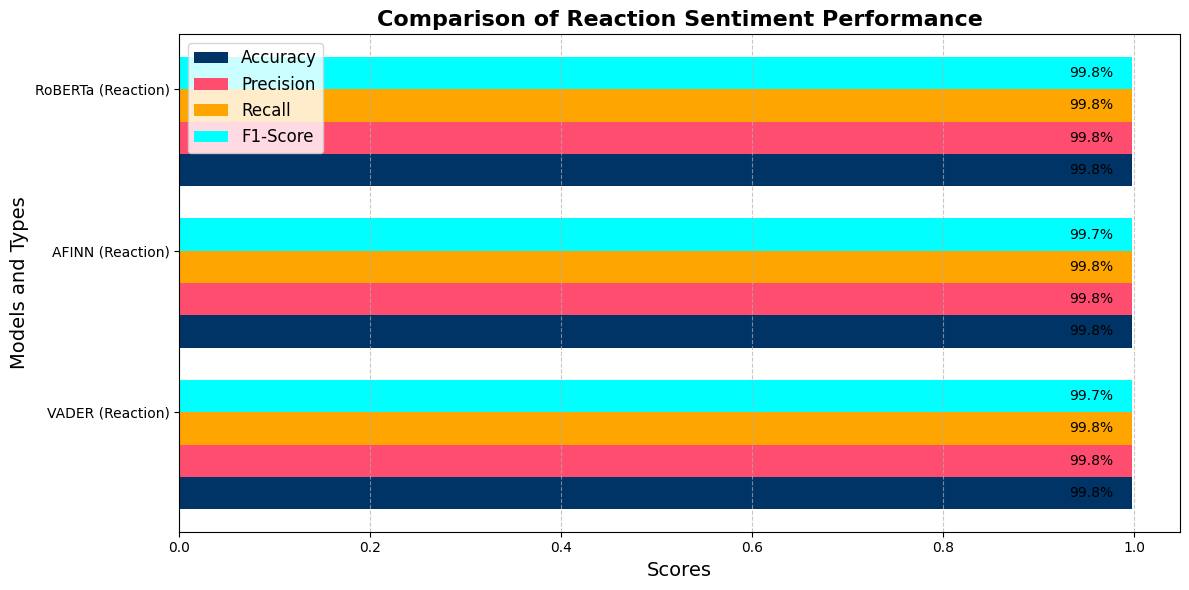

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter out only "Reaction" rows from metrics_df
reaction_metrics_df = metrics_df[metrics_df['Type'] == 'Reaction']

# Set up the bar height and index for the Reaction metrics
bar_height = 0.2
index = np.arange(len(reaction_metrics_df))  # Use only the Reaction metrics

# Create figure for Reaction metrics
fig, ax = plt.subplots(figsize=(12, 6))

# Define the color palette based on user preferences
colors_reaction = ['#003366', '#FF4D70', '#FFA500', '#00FFFF']  # Navy Blue, Pinky Red, Yellow Orange, Cyan

# Define the bar positions for Reaction metrics (horizontal bars)
reaction_bar1 = ax.barh(index - bar_height, reaction_metrics_df['Accuracy'], bar_height, label='Accuracy', color=colors_reaction[0])
reaction_bar2 = ax.barh(index, reaction_metrics_df['Precision'], bar_height, label='Precision', color=colors_reaction[1])
reaction_bar3 = ax.barh(index + bar_height, reaction_metrics_df['Recall'], bar_height, label='Recall', color=colors_reaction[2])
reaction_bar4 = ax.barh(index + 2*bar_height, reaction_metrics_df['F1-Score'], bar_height, label='F1-Score', color=colors_reaction[3])

# Add scores inside the bars for Reaction metrics
def add_scores(bars, scores):
    for bar, score in zip(bars, scores):
        width = bar.get_width()
        ax.text(width - 0.02, bar.get_y() + bar.get_height() / 2,  # Position the score text
                f'{score*100:.1f}%',  # Display percentage with one decimal place
                va='center', ha='right', color='black')  # Set color of text to black

# Add scores to Reaction bars
add_scores(reaction_bar1, reaction_metrics_df['Accuracy'])
add_scores(reaction_bar2, reaction_metrics_df['Precision'])
add_scores(reaction_bar3, reaction_metrics_df['Recall'])
add_scores(reaction_bar4, reaction_metrics_df['F1-Score'])

# Set labels and titles for Reaction metrics
ax.set_xlabel('Scores', fontsize=14)
ax.set_ylabel('Models and Types', fontsize=14)
ax.set_title('Comparison of Reaction Sentiment Performance', fontsize=16, fontweight='bold')

# Customizing the y-axis labels for Reaction metrics
ax.set_yticks(index + bar_height * 1.5)  # Adjust for better spacing
ax.set_yticklabels([f'{row["Model"]} ({row["Type"]})' for _, row in reaction_metrics_df.iterrows()])
ax.legend(loc='upper left', fontsize=12)

# Improve aesthetics with gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Sample DataFrame (ensure df3 is loaded with the correct data)
# df3 = pd.read_csv('your_data.csv')

# Estimated followers
followers = 152000

# Set display option to prevent truncation of long URLs
pd.set_option('display.max_colwidth', None)  # This will prevent URL truncation

# Check if necessary columns are in the DataFrame
required_columns = ['Reaction Count', 'Comment Count', 'Shared Count', 'Content', 'Comments_Sentiment', 'Sentiment React', 'Url', 'Posted At']
if all(col in df3.columns for col in required_columns):
    # Calculate Total Interactions (TI) and Spreading (S)
    df3['TI'] = df3['Reaction Count'] + df3['Comment Count'] + df3['Shared Count']
    df3['S'] = df3['Shared Count'] / followers

    # Compute z-scores
    df3['TI_z'] = zscore(df3['TI'])
    df3['S_z'] = zscore(df3['S'])

    # Detect viral posts: z-score > 2 for both
    df3['Viral'] = (df3['TI_z'] > 2) & (df3['S_z'] > 2)

    # Display only viral posts
    viral_posts = df3[df3['Viral']]



# Sort by Total Interactions (TI) and Spreading (S) in descending order and get the top 5
top_5_ti_s = df3.sort_values(by=['TI', 'S'], ascending=[False, False]).head(5)

# Display the top 5 highest TI and S with the full URL and relevant columns
top_5_ti_s[['Content', 'Url', 'TI', 'S', 'Posted At', 'Comments_Sentiment', 'Sentiment React']]


,Content,Url,TI,S,Posted At,Comments_Sentiment,Sentiment React
121,"At around 10:00 A.M. today, 13 November 2024, we received a bomb threat from an anonymous person. For the safety of all students and employees, immediate evacuation is now being carried out in our Batac campus. Classes shall shift to asynchronous mode while employees shall shift to work-from-home arrangement. We are already coordinating with the police authorities and our own security force is now on red alert as we seriously address this concern.\n\nLet us all keep calm as we take all necessary precaution for everyone’s safety.\nwith a Photo: https://www.facebook.com/photo/?fbid=969270535235237&set=a.459121426250153",https://www.facebook.com/MMSUofficial/posts/pfbid0aAUxNKrqfhmQStCfMV8eUGKfeFrQqXjrefuLJfjnoimmKNC4pyetQ2DfkphCy7gTl,14643.0,0.034388,2024-11-13 11:15:00,Positive,Negative
752,"ð—¡ð—˜ð—ªð—¦ | ð—Ÿð—®ð˜„ ð˜€ð˜ð˜‚ð—±ð—²ð—»ð˜ ð˜„ð—¶ð—»ð˜€ ð—£ð—”ð—šð—–ð—¢ð—¥ ð—½ð—µð—¼ð˜ð—¼ ð˜ð—¶ð—¹ð˜\n\nJoining a roster of exceptional Filipino photographers, Aljon Tugaoen, a second-year law student of Mariano Marcos State University, emerged as one of the grand winners in a photography competition sponsored by the Philippine Amusement and Gaming Corporation (PAGCOR). \n\nTugaoenâ€™s â€˜Over and Under the Rocks of Pangil,â€™ was announced as among the 12 best photos under the conventional category yesterday, September 13. \n\nHis photo, featuring a golden hour silhouette presentation of Pangil rock formation in Currimao, Ilocos Norte, is now part of an exhibit at the National Museum of National History in Manila. \n\nð—¥ð—˜ð—”ð—— ð— ð—¢ð—¥ð—˜: https://www.mmsu.edu.ph/news/law-student-wins-pagcor-photo-tilt\n\n#MMSU #MMSUACHIEVE #PAGCOR\nwith a Photo: https://www.facebook.com/photo/?fbid=689263099902650&set=a.459121426250153",https://www.facebook.com/MMSUofficial/posts/pfbid035ykTLfXUj3HwdvqoiCmpKbGbGauGdXNCQRf2zHbn1hSsTjXDkbmp8a3bL4GCBQXNl,12373.0,0.002526,2023-09-14 17:14:00,Positive,Positive
1387,OFFICIAL STATEMENT OF THE MARIANO MARCOS STATE UNIVERSITY ON THE VIDEO POSTED BY ONE “CALIX COLE”\nwith a Photo: https://www.facebook.com/photo/?fbid=5481496148578965&set=a.469438266451470,https://www.facebook.com/MMSUofficial/posts/pfbid0268tXrPjMTVSs2TUfsf3A4C3jXiW8WGGMSNK3LkoE2tf5nPvUKkN8qMUpYwpmrZQKl,11982.0,0.012151,2022-07-22 17:57:00,Neutral,Positive
794,"Today, MMSU joins the nation in celebrating Filipino nationalism. We salute all our heroes, both the celebrated and the unsung, who courageously toiled to obtain and sustain freedom for the Filipino nation, and to the heroes of today who valiantly selflessly serve our people.\n\nFrom MMSU President Shirley C. Agrupis and the whole university community, Happy National Heroes' Day!\n\n#NationalHeroesDay2023 #MMSU\nwith a Photo: https://www.facebook.com/photo/?fbid=679112997584327&set=a.459121422916820",https://www.facebook.com/MMSUofficial/posts/pfbid029wreNuenERrYKGDTfkKNS56eGK4C9fQ1FCHhUiNmNmR6mszMMgLUxsykb95Hn1Zal,9873.0,0.006651,2023-08-28 12:43:00,Neutral,Positive
1628,"ð‰ð”ð’ð“ ðˆð | ð—¥ð—®ð—»ð—¸ ðŸ­: ð— ð— ð—¦ð—¨ ð—½ð—¼ð˜€ð˜ð˜€ ðŸ­ðŸ¬ðŸ¬% ð—¶ð—» ð—¯ð—®ð—¿ ð—²ð˜…ð—®ð—ºð˜€\n\nSustaining its stature as one of the countryâ€™s best law schools in the country, the Mariano Marcos State University has produced 100% passing rate in the 2022 Bar Examinations, landing as rank 1 top-performer school among institutions with 11 to 50 examinees. The national passing rate stood at 72.28%.\n\nTwelve takers emerged victorious from the grueling exam administered by the Supreme Court last February. \n \nThe new lawyers are Atty. Ofe Marie L. Balalio, Atty. Nikki Joy F. Barroga, Atty. Czarina Mae Claudine F. Cid, Atty. Juan Paulo P. Flojo, Atty. Alyssa Marie A. Jacinto, Atty. Leidee January G. Lacambra, Atty. Myka Josa D. Llaguno, Atty. Zadrick R. Lucas, Atty. Jheia Lindhelle N. Paned, Atty. Marianne Shen L. Petilla, Atty. Alessandra Rica P. Rupisa